In [57]:
####
import pandas as pd
import seaborn as sns
data = pd.read_csv("D:/Loveforlearning_books/jobs_varsha/Datascience/pythoncodes/KNN Assignment/KNN Assignment/bangalore house price prediction OHE-data.csv")
data.shape

(7120, 108)

In [58]:
data.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [59]:
#Data Cleaning . Finding null values 
data.isnull().sum()


bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [9]:
data.info

<bound method DataFrame.info of       bath  balcony   price  total_sqft_int  bhk  price_per_sqft  \
0      3.0      2.0  150.00          1672.0    3     8971.291866   
1      3.0      3.0  149.00          1750.0    3     8514.285714   
2      3.0      2.0  150.00          1750.0    3     8571.428571   
3      2.0      2.0   40.00          1250.0    2     3200.000000   
4      2.0      2.0   83.00          1200.0    2     6916.666667   
...    ...      ...     ...             ...  ...             ...   
7115   3.0      2.0  325.00          2900.0    3    11206.896552   
7116   3.0      1.0   84.83          1780.0    3     4765.730337   
7117   2.0      1.0   48.00           880.0    2     5454.545455   
7118   2.0      1.0   55.00          1000.0    2     5500.000000   
7119   2.0      1.0   78.00          1400.0    3     5571.428571   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                                 1                        0   
1                      

In [60]:
##Description stats
data.describe

<bound method NDFrame.describe of       bath  balcony   price  total_sqft_int  bhk  price_per_sqft  \
0      3.0      2.0  150.00          1672.0    3     8971.291866   
1      3.0      3.0  149.00          1750.0    3     8514.285714   
2      3.0      2.0  150.00          1750.0    3     8571.428571   
3      2.0      2.0   40.00          1250.0    2     3200.000000   
4      2.0      2.0   83.00          1200.0    2     6916.666667   
...    ...      ...     ...             ...  ...             ...   
7115   3.0      2.0  325.00          2900.0    3    11206.896552   
7116   3.0      1.0   84.83          1780.0    3     4765.730337   
7117   2.0      1.0   48.00           880.0    2     5454.545455   
7118   2.0      1.0   55.00          1000.0    2     5500.000000   
7119   2.0      1.0   78.00          1400.0    3     5571.428571   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                                 1                        0   
1                    

In [61]:
##Feauture Selection 
corr = data.corr()
corr

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
bath,1.000000,0.283192,0.523941,0.653435,0.882461,0.350497,-0.118940,0.030143,0.161243,0.022495,...,-0.010388,-0.019047,-0.015385,0.002339,0.049603,0.011201,-0.020635,0.006606,-0.017608,-0.002474
balcony,0.283192,1.000000,0.138946,0.200648,0.269511,0.068018,0.120220,-0.048382,-0.138809,0.117337,...,0.027585,-0.015110,-0.018297,0.022038,0.024569,-0.020262,0.022541,0.000445,0.008764,-0.018788
price,0.523941,0.138946,1.000000,0.797955,0.497817,0.717821,-0.114594,-0.014613,0.229543,0.012542,...,-0.015052,-0.023919,-0.017011,0.019606,0.045599,0.000618,-0.021200,0.019573,-0.015800,-0.006216
total_sqft_int,0.653435,0.200648,0.797955,1.000000,0.647485,0.376673,-0.133719,0.014041,0.219383,0.009710,...,-0.012294,-0.021914,-0.016353,0.003619,0.037007,0.007224,-0.015287,0.007875,-0.011000,-0.010931
bhk,0.882461,0.269511,0.497817,0.647485,1.000000,0.323285,-0.142496,0.044187,0.178557,0.043887,...,-0.009725,-0.021754,-0.011599,-0.002366,0.043803,0.016102,-0.026186,0.005351,-0.010418,0.008504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Hosur Road,0.011201,-0.020262,0.000618,0.007224,0.016102,0.001412,0.001408,0.001151,-0.003231,-0.036076,...,-0.003028,-0.003028,-0.002958,-0.002958,-0.002958,1.000000,-0.002887,-0.002887,-0.002887,-0.002887
location_Horamavu Banaswadi,-0.020635,0.022541,-0.021200,-0.015287,-0.026186,-0.037227,0.024451,-0.018187,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,1.000000,-0.002817,-0.002817,-0.002817
location_Domlur,0.006606,0.000445,0.019573,0.007875,0.005351,0.054259,0.006048,0.002433,-0.013638,0.020595,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,1.000000,-0.002817,-0.002817
location_Mahadevpura,-0.017608,0.008764,-0.015800,-0.011000,-0.010418,-0.023633,0.030585,-0.025060,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,-0.002817,1.000000,-0.002817


<AxesSubplot:>

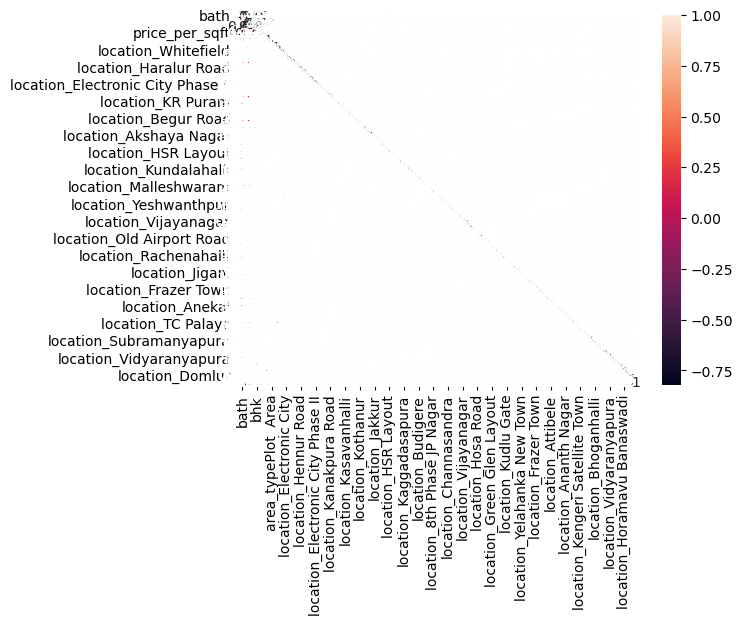

In [62]:
sns.heatmap(corr,annot = True)


In [63]:
import numpy as np
corr.abs()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
print(upper_tri)


                             bath   balcony     price  total_sqft_int  \
bath                          NaN  0.283192  0.523941        0.653435   
balcony                       NaN       NaN  0.138946        0.200648   
price                         NaN       NaN       NaN        0.797955   
total_sqft_int                NaN       NaN       NaN             NaN   
bhk                           NaN       NaN       NaN             NaN   
...                           ...       ...       ...             ...   
location_Hosur Road           NaN       NaN       NaN             NaN   
location_Horamavu Banaswadi   NaN       NaN       NaN             NaN   
location_Domlur               NaN       NaN       NaN             NaN   
location_Mahadevpura          NaN       NaN       NaN             NaN   
location_Tumkur Road          NaN       NaN       NaN             NaN   

                                  bhk  price_per_sqft  \
bath                         0.882461        0.350497   
balcony  

C:\Users\shiva\AppData\Local\Temp\ipykernel_6816\497042168.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


In [16]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(); print(to_drop)


['price', 'total_sqft_int', 'bhk', 'price_per_sqft']


In [64]:
##price is dependent variable. 
df1=data.drop(['total_sqft_int', 'bhk', 'price_per_sqft'],axis='columns')
df1.head()

,bath,balcony,price,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df1['bath'].unique()


array([3., 2., 1., 4., 5., 9., 6., 8., 7.])

Text(0, 0.5, 'Count')

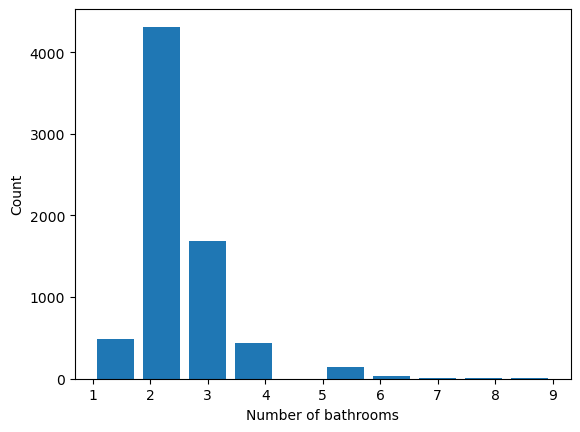

In [66]:
from matplotlib import pyplot as plt

import matplotlib 
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [67]:
df1['balcony'].unique()

array([2.        , 3.        , 1.        , 0.        , 1.58437574])

In [68]:
y= df1['price']
y = y.values.reshape(-1,1)
len(y)

7120

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 105 entries, bath to location_Tumkur Road
dtypes: float64(3), int64(102)
memory usage: 5.7 MB


In [33]:
X=df1.drop(['price'],axis='columns')
X

,bath,balcony,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X.shape

(7120, 104)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)


In [77]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
ytrain_transformed = lab.fit_transform(y_train)

#view transformed values
print(ytrain_transformed)


[680 965 217 ... 396 984 589]


C:\Users\shiva\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
##### Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [79]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,ytrain_transformed)   #### 85% of the data is trained 

KNeighborsClassifier()

In [80]:
pred = knn.predict(X_test)
pred

array([313, 176, 475, ..., 359, 313, 559], dtype=int64)